In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
#from sklearn import cross_validation, metrics
from sklearn.preprocessing import Normalizer
#from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer
from pylab import plot, show, subplot, specgram, imshow, savefig


import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')


In [2]:
train = pd.read_csv("../input/train_u6lujuX_CVtuZ9i.csv") 
test = pd.read_csv("../input/test_Y3wMUE5_7gLdaTN.csv") 


In [3]:
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing():
    missing = train.columns[train.isnull().any()].tolist()
    return missing

In [7]:
#from this we can find the total missing data in each columns

train[show_missing()].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [8]:
print (train['Property_Area'].value_counts())
print (train['Education'].value_counts())
print (train['Gender'].value_counts())
print (train['Dependents'].value_counts())
print (train['Married'].value_counts())
print (train['Self_Employed'].value_counts())
print (train['Loan_Status'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [9]:
#filling data with approperiate measure of central tendency
train['Gender'] = train['Gender'].fillna( train['Gender'].dropna().mode().values[0] )
train['Married'] = train['Married'].fillna( train['Married'].dropna().mode().values[0] )
train['Dependents'] = train['Dependents'].fillna( train['Dependents'].dropna().mode().values[0] )
train['Self_Employed'] = train['Self_Employed'].fillna( train['Self_Employed'].dropna().mode().values[0] )
train['LoanAmount'] = train['LoanAmount'].fillna( train['LoanAmount'].dropna().mean() )
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna( train['Loan_Amount_Term'].dropna().mode().values[0] )
train['Credit_History'] = train['Credit_History'].fillna( train['Credit_History'].dropna().mode().values[0] )
train['Dependents'] = train['Dependents'].str.rstrip('+')

In [10]:
train[show_missing()].isnull().sum()

Series([], dtype: float64)

In [11]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


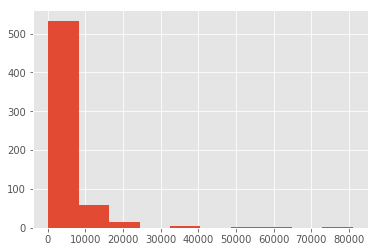

In [14]:
import matplotlib.pyplot as plt
plt.hist(train.ApplicantIncome,bins=10)
plt.show()


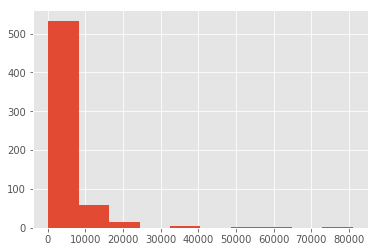

In [15]:
train['ApplicantIncome'].hist()



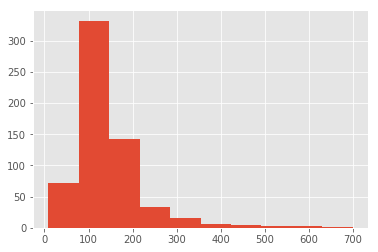

In [16]:
train['LoanAmount'].hist()

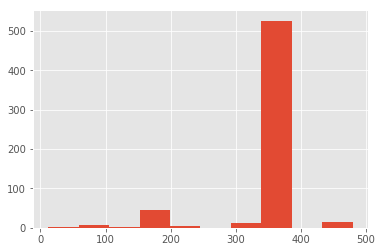

In [17]:
train['Loan_Amount_Term'].hist()

Text(0, 0.5, 'mean ApplicantIncom')

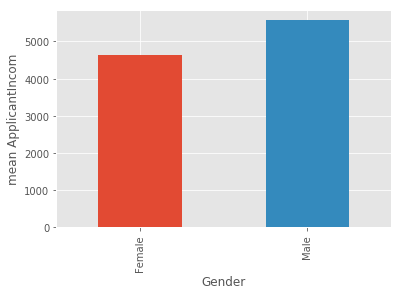

In [18]:
ax = train.groupby('Gender').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Gender")
ax.set_ylabel("mean ApplicantIncom")

Text(0, 0.5, 'mean ApplicantIncom')

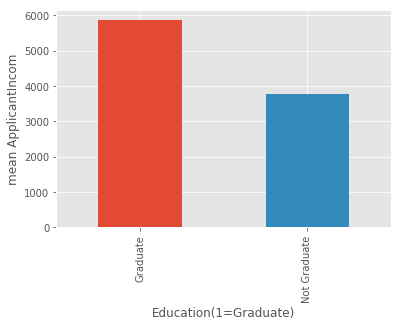

In [19]:
ax = train.groupby('Education').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Education(1=Graduate)")
ax.set_ylabel("mean ApplicantIncom")

Text(0, 0.5, 'mean ApplicantIncom')

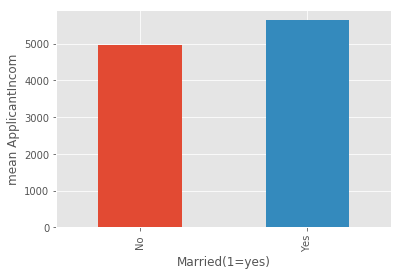

In [20]:
ax = train.groupby('Married').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Married(1=yes)")
ax.set_ylabel("mean ApplicantIncom")

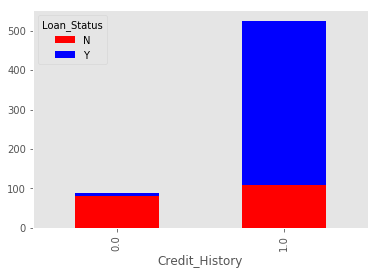

In [21]:
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

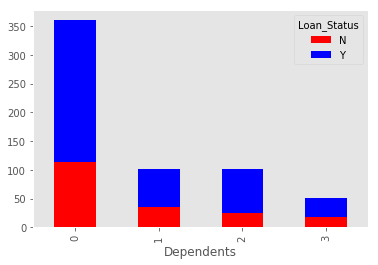

In [22]:
temp3 = pd.crosstab(train['Dependents'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

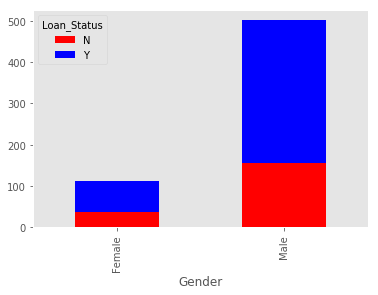

In [23]:
temp3 = pd.crosstab(train['Gender'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

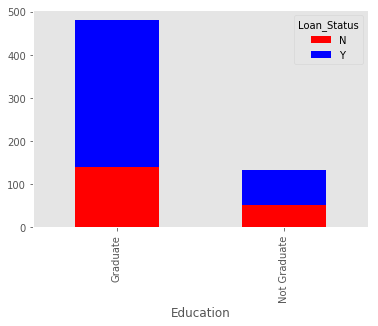

In [24]:
temp3 = pd.crosstab(train['Education'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

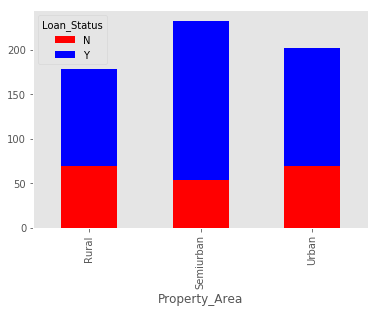

In [25]:
temp3 = pd.crosstab(train['Property_Area'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [26]:
print (train['Property_Area'].value_counts())
print (train['Education'].value_counts())
print (train['Gender'].value_counts())
print (train['Dependents'].value_counts())
print (train['Married'].value_counts())
print (train['Self_Employed'].value_counts())
print (train['Loan_Status'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Male      502
Female    112
Name: Gender, dtype: int64
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [27]:
#Converting categorical data to continuous data using 0 1 hot encoding
train['Gender'] = train['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train['Married'] = train['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
#train['Property_Area'] = train['Property_Area'].map({'Urban':0, 'Rural':1,}).astype(np.int)

train['Dependents'] = train['Dependents'].astype(np.int)

In [28]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,Semiurban,0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


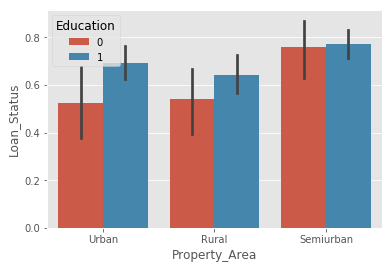

In [29]:
sns.barplot(x="Property_Area", y="Loan_Status", hue="Education", data=train);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


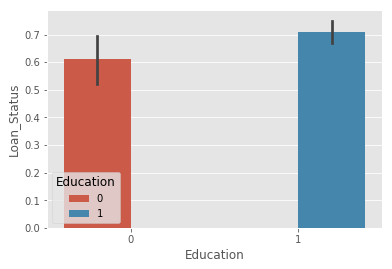

In [30]:
sns.barplot(x="Education", y="Loan_Status", hue="Education", data=train);

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


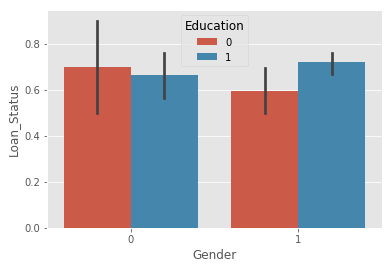

In [31]:
sns.barplot(x="Gender", y="Loan_Status", hue="Education", data=train);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


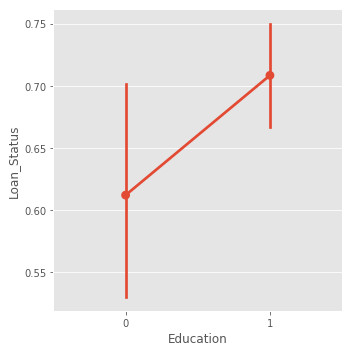

In [32]:
sns.factorplot(x='Education',y='Loan_Status',data=train)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


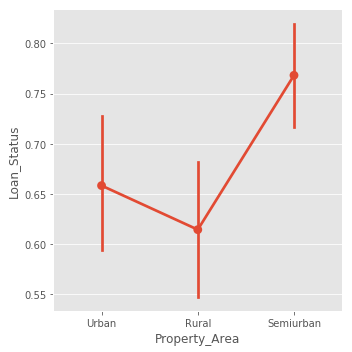

In [33]:
sns.factorplot(x='Property_Area',y='Loan_Status',data=train)

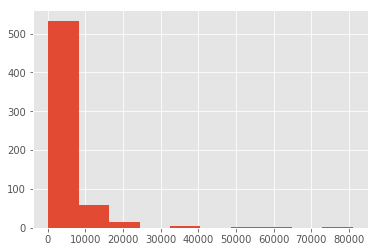

In [34]:
train['ApplicantIncome'].hist()

In [35]:
train['Property_Area'] = LabelEncoder().fit_transform(train['Property_Area'])

In [36]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


In [37]:
print (train['Property_Area'].value_counts())

1    233
2    202
0    179
Name: Property_Area, dtype: int64


In [38]:
corr=train.corr()["Loan_Status"]
corr[np.argsort(corr, axis=0)[::-1]]

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

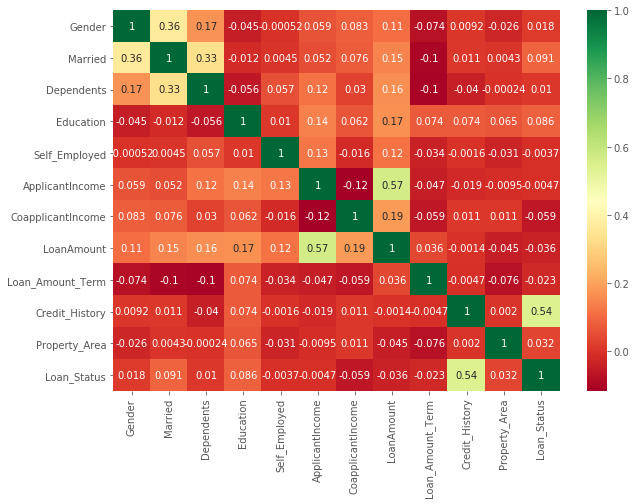

In [39]:
import seaborn as sns
corrmat = train.corr()
plt.figure(figsize = (10,7))


corr_features = corrmat.index[abs(corrmat["Loan_Status"])>-0.1]
g = sns.heatmap(train[corr_features].corr(),annot=True,cmap="RdYlGn")

In [40]:
targetfet = train.Loan_Status

features = train.drop(['Loan_Status','Loan_ID'], axis = 1)
targetfet.shape
#features.shape

(614,)

In [41]:
####Prediction model########
#Train-Test split
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(features, targetfet, test_size = 0.2, random_state = 42)
label_train.shape

(491,)

In [42]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)

Training score:  0.8167006109979633
Testing score:  0.7886178861788617


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
#decision tree
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

Training score:  0.9837067209775967
Testing score:  0.7073170731707317


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)
rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)

Training score:  0.9918533604887984
Testing score:  0.7235772357723578


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression',  'Decision Tree', 'Random Forest'],
        'Training_Score' : [logis_score_train,  dt_score_train, rfc_score_train],
        'Testing_Score'  : [logis_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
0,Logistic Regression,0.816701,0.788618
2,Random Forest,0.991853,0.723577
1,Decision Tree,0.983707,0.707317


## Same thing after doing label encoding

In [46]:
clf = LogisticRegression()
clf
#Fiting into model
clf.fit(data_train, label_train)
#Prediction using test data
label_pred = clf.predict(data_test)
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(label_test, label_pred))

0.7886178861788617


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
train = train.apply(LabelEncoder().fit_transform)

In [48]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,376,0,100,8,1,2,1
1,1,1,1,1,1,0,306,60,81,8,1,0,0
2,2,1,1,0,1,1,139,0,26,8,1,2,1
3,3,1,1,0,0,0,90,160,73,8,1,2,1
4,4,1,0,0,1,0,381,0,94,8,1,2,1


In [49]:
targetfet1 = train.Loan_Status

features1 = train.drop(['Loan_Status'], axis = 1)

In [50]:
####Prediction model########
#Train-Test split
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(features1, targetfet1, test_size = 0.2, random_state = 42)

In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)

Training score:  0.814663951120163
Testing score:  0.7886178861788617


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
